In [8]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [28]:
class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= self.test_size, random_state = self.random_state)
        dim = x_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(x_train, y_train, x_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(x_train, y_train, x_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
        
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[1]
        
        return self

    
    def transform(self, x):
        return x[:, self.indices_]
    
    
    def _calc_score(self, x_train, y_train, x_test, y_test, indices):
        self.estimator.fit(x_train[:, indices], y_train)
        y_pred = self.estimator.predict(x_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [29]:
df_wine = pd.read_csv('Https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'NonFlavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

x, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

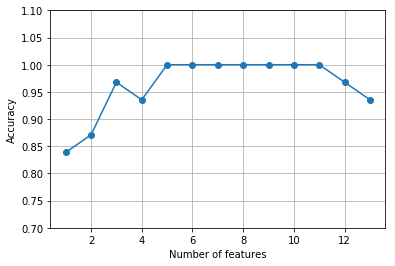

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


knn = KNeighborsClassifier(n_neighbors = 2)
sbs = SBS(knn, k_features = 1)
sbs.fit(x_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

# Feature Importance

Alcohol 0.18248261633081447
Malic acid 0.15860977439208598
Ash 0.15094794797803848
Alcalinity of ash 0.13198679742764774
Magnesium 0.1065890612251934
Total phenols 0.07824278809689261
Flavanoids 0.060717598651490616
NonFlavanoid phenols 0.032033191209174174
Proanthocyanins 0.025399678325383392
Color intensity 0.022351122470445416
Hue 0.02207807404077184
OD280/OD315 of diluted wines 0.014645160876579336
Proline 0.013916188975481122


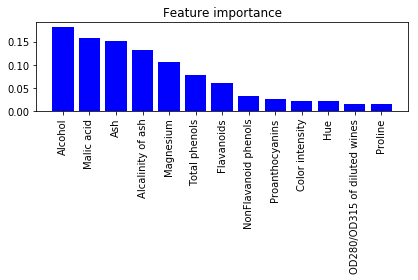

In [32]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(x_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print(feat_labels[f], importance[indices[f]])
    

plt.title('Feature importance')
plt.bar(range(x_train.shape[1]), importances[indices], color = 'blue', align = 'center')
plt.xticks(range(x_train.shape[1]), feat_labels, rotation = 90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()

In [34]:
indices

array([ 9, 12,  6, 11,  0, 10,  5,  3,  1,  8,  4,  7,  2], dtype=int64)